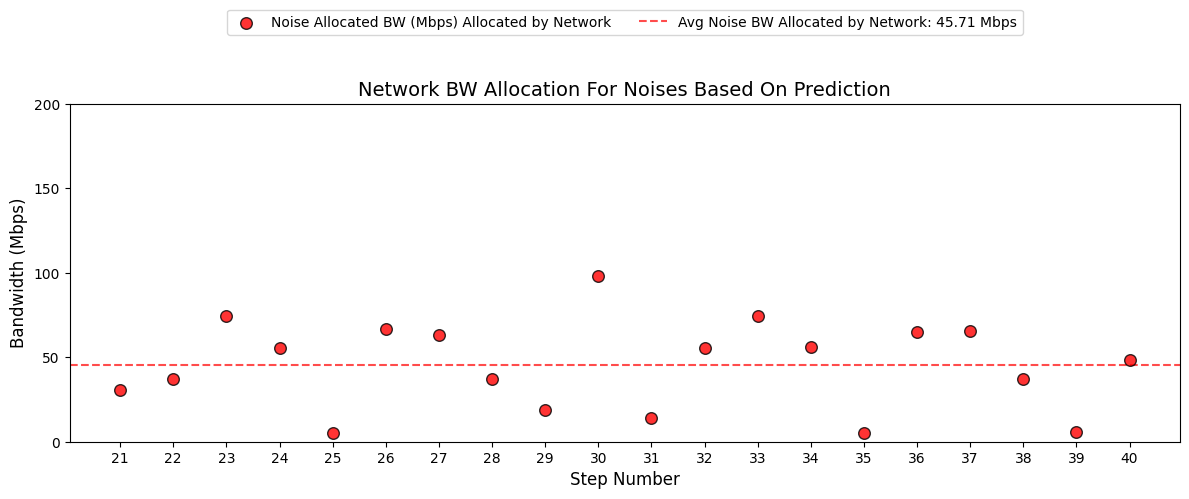

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Inputs
app = [
    284.39, 317.24, 255.75, 290.71, 207.02, 318.25, 313.79, 216.98, 289.15, 221.49,
    318.16, 290.85, 253.00, 314.74, 221.54, 285.79, 278.88, 256.09, 308.77, 218.31,
]

net = [
    30.586367570655998, 37.18651079868619, 74.32981665137727, 55.73421638664487,
    5.033119635967012624, 66.94372492771171, 63.25692745653396, 37.17630647195831,
    18.496968840377686, 98.11072024298264, 14.011535020885205, 55.742682852649004,
    74.3793275449659, 55.83097153825542, 5.027347073803894412, 64.93995046466524,
    65.76139383579718, 37.25484344492752, 5.8423532608462534, 48.58388080693916,
]

BW_MAX = 400
steps = list(range(21, len(app) + 21))

app_bw = []
net_bw = []
errors = []

# Calculate bandwidth and error
for a, n in zip(app, net):
    app_bw_val = a
    net_bw_val = n
    error = abs(app_bw_val - net_bw_val) / BW_MAX * 100

    app_bw.append(app_bw_val)
    net_bw.append(net_bw_val)
    errors.append(error)

# Create figure and axis
plt.figure(figsize=(12, 5))

# Plot connecting lines
# for i in range(len(steps)):
#     plt.plot([steps[i], steps[i]], [net_bw[i], app_bw[i]], 'k--', alpha=0.5)

# Scatter plot
# plt.scatter(steps, app_bw, color='green', label='App Predicted BW (Mbps)',
#             zorder=3, s=70, edgecolor='black', alpha=0.8)
plt.scatter(steps, net_bw, color='red', label='Noise Allocated BW (Mbps) Allocated by Network',
            zorder=3, s=70, edgecolor='black', alpha=0.8)

# Statistics
avg_app_bw = np.mean(app_bw)
avg_net_bw = np.mean(net_bw)
avg_error = np.mean(errors)

# Avg lines
# plt.axhline(y=avg_app_bw, color='green', linestyle='--', alpha=0.7,
#             label=f'Avg App BW: {avg_app_bw:.2f} Mbps')
plt.axhline(y=avg_net_bw, color='red', linestyle='--', alpha=0.7,
            label=f'Avg Noise BW Allocated by Network: {avg_net_bw:.2f} Mbps')

# Appearance
plt.title("Network BW Allocation For Noises Based On Prediction", fontsize=14)
plt.xlabel("Step Number", fontsize=12)
plt.ylabel("Bandwidth (Mbps)", fontsize=12)
plt.xticks(steps)
plt.yticks(np.arange(0, 201, 50))
# plt.grid(True, linestyle='--', alpha=0.5)

# Legend above plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.8)  # Make space at the top

plt.show()

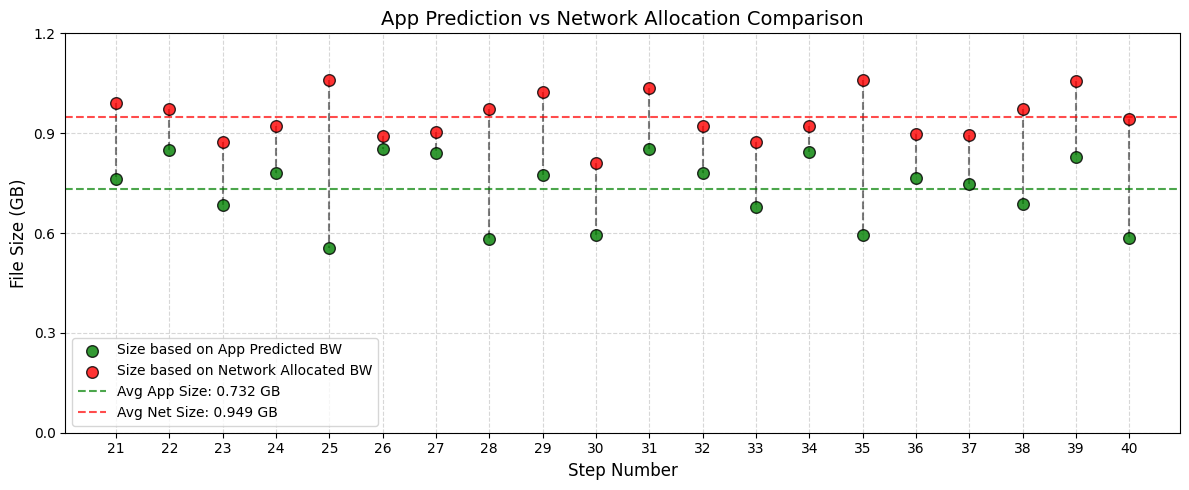

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Inputs
app = [
    284.39,
    317.24,
    255.75,
    290.71,
    207.02,
    318.25,
    313.79,
    216.98,
    289.15,
    221.49,
    318.16,
    290.85,
    253.00,
    314.74,
    221.54,
    285.79,
    278.88,
    256.09,
    308.77,
    218.31,
]

net = [
    30.586367570655998,
    37.18651079868619,
    74.32981665137727,
    55.73421638664487,
    5.033119635967012624,
    66.94372492771171,
    63.25692745653396,
    37.17630647195831,
    18.496968840377686,
    98.11072024298264,
    14.011535020885205,
    55.742682852649004,
    74.3793275449659,
    55.83097153825542,
    5.027347073803894412,
    64.93995046466524,
    65.76139383579718,
    37.25484344492752,
    5.8423532608462534,
    48.58388080693916,
]

BW_MAX = 400
FILE_SIZE_GB = 1.072
steps = list(range(21, len(app)+21))

app_sizes = []
net_sizes = []
errors = []

# Calculate sizes and errors
for a, n in zip(app, net):
    app_bw = a
    net_bw = 400 - n

    app_pct = (app_bw / BW_MAX)
    net_pct = (net_bw / BW_MAX)

    app_size = app_pct * FILE_SIZE_GB
    net_size = net_pct * FILE_SIZE_GB
    error = abs(app_pct - net_pct) * 100

    app_sizes.append(app_size)
    net_sizes.append(net_size)
    errors.append(error)

# Create figure and axis
plt.figure(figsize=(12, 5))

# Plot connecting lines
for i in range(len(steps)):
    plt.plot([steps[i], steps[i]], [net_sizes[i], app_sizes[i]], 'k--', alpha=0.5)


# Scatter plot with larger markers and improved visibility
plt.scatter(steps, app_sizes, color='green', label='Size based on App Predicted BW',
           zorder=3, s=70, edgecolor='black', alpha=0.8)
plt.scatter(steps, net_sizes, color='red', label='Size based on Network Allocated BW',
           zorder=3, s=70, edgecolor='black', alpha=0.8)

# Calculate statistics
avg_app_size = np.mean(app_sizes)
avg_net_size = np.mean(net_sizes)
avg_error = np.mean(errors)
total_app = sum(app_sizes)
total_net = sum(net_sizes)
diff_percentage = abs(total_app - total_net) / total_net * 100

# Add average lines
plt.axhline(y=avg_app_size, color='green', linestyle='--', alpha=0.7,
           label=f'Avg App Size: {avg_app_size:.3f} GB')
plt.axhline(y=avg_net_size, color='red', linestyle='--', alpha=0.7,
           label=f'Avg Net Size: {avg_net_size:.3f} GB')

# Improve visual appearance
plt.title("App Prediction vs Network Allocation Comparison", fontsize=14, fontweight='normal')
plt.xlabel("Step Number", fontsize=12)
plt.ylabel("File Size (GB)", fontsize=12)
plt.xticks(steps)
plt.yticks(np.arange(0, 1.3, 0.3))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

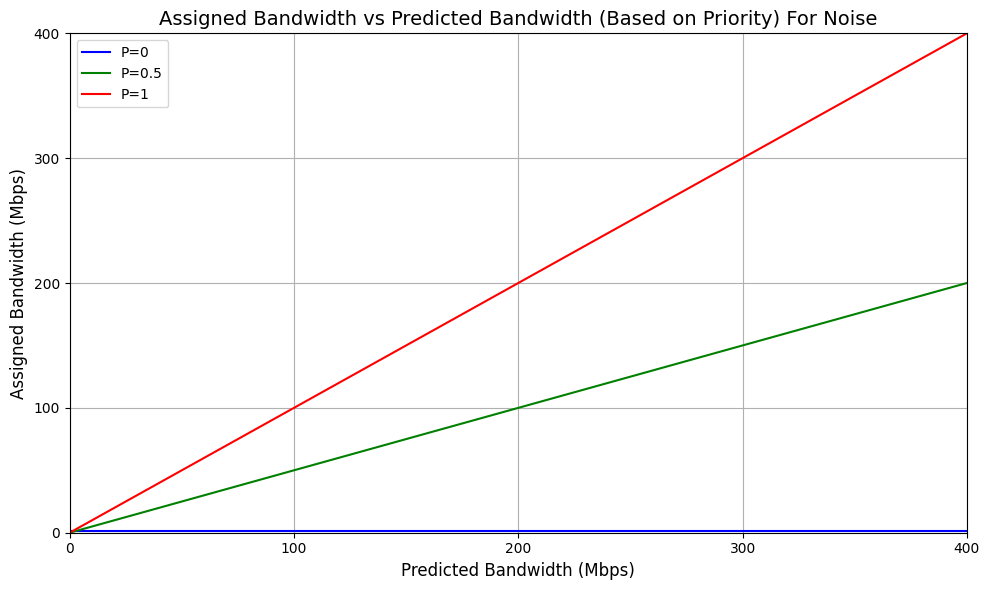

Sample calculations:
Bandwidth: 0 Mbps
  P=0:   1.00 Mbps
  P=0.5: 0.00 Mbps
  P=1:   0.00 Mbps

Bandwidth: 100 Mbps
  P=0:   1.00 Mbps
  P=0.5: 50.00 Mbps
  P=1:   100.00 Mbps
  Percentage P=0:   1.00%
  Percentage P=0.5: 50.00%
  Percentage P=1:   100.00%

Bandwidth: 200 Mbps
  P=0:   1.00 Mbps
  P=0.5: 100.00 Mbps
  P=1:   200.00 Mbps
  Percentage P=0:   0.50%
  Percentage P=0.5: 50.00%
  Percentage P=1:   100.00%

Bandwidth: 300 Mbps
  P=0:   1.00 Mbps
  P=0.5: 150.00 Mbps
  P=1:   300.00 Mbps
  Percentage P=0:   0.33%
  Percentage P=0.5: 50.00%
  Percentage P=1:   100.00%

Bandwidth: 400 Mbps
  P=0:   1.00 Mbps
  P=0.5: 200.00 Mbps
  P=1:   400.00 Mbps
  Percentage P=0:   0.25%
  Percentage P=0.5: 50.00%
  Percentage P=1:   100.00%



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bandwidth range
BW_MIN = 0
BW_MAX = 400
bandwidth_values = np.linspace(BW_MIN, BW_MAX, 1000)

# Define the function for assigned bandwidth
def calculate_assigned_bandwidth(bandwidth_mbits, P):
    return 1 if P==0 else P * bandwidth_mbits

results_P0 = [calculate_assigned_bandwidth(bw, 0) for bw in bandwidth_values]
results_P05 = [calculate_assigned_bandwidth(bw, 0.5) for bw in bandwidth_values]
results_P1 = [calculate_assigned_bandwidth(bw, 1) for bw in bandwidth_values]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(bandwidth_values, results_P0, label="P=0", color='blue')
ax1.plot(bandwidth_values, results_P05, label="P=0.5", color='green')
ax1.plot(bandwidth_values, results_P1, label="P=1", color='red')
ax1.set_xlabel("Predicted Bandwidth (Mbps)", fontsize=12)
ax1.set_ylabel("Assigned Bandwidth (Mbps)", fontsize=12)
ax1.set_title("Assigned Bandwidth vs Predicted Bandwidth (Based on Priority) For Noise", fontsize=14)
ax1.grid(True)
ax1.set_xlim(0, 400)
ax1.set_xticks(np.arange(0, 401, 100))
ax1.set_ylim(0, 200)
ax1.set_yticks(np.arange(0, 401, 100))
ax1.legend()

plt.tight_layout()
plt.show()

# Print some example values for verification
print("Sample calculations:")
for bw in [0, 100, 200, 300, 400]:
    print(f"Bandwidth: {bw} Mbps")
    p0_val = calculate_assigned_bandwidth(bw, 0)
    p05_val = calculate_assigned_bandwidth(bw, 0.5)
    p1_val = calculate_assigned_bandwidth(bw, 1)

    print(f"  P=0:   {p0_val:.2f} Mbps")
    print(f"  P=0.5: {p05_val:.2f} Mbps")
    print(f"  P=1:   {p1_val:.2f} Mbps")

    if bw > 0:
        print(f"  Percentage P=0:   {p0_val/bw*100:.2f}%")
        print(f"  Percentage P=0.5: {p05_val/bw*100:.2f}%")
        print(f"  Percentage P=1:   {p1_val/bw*100:.2f}%")
    print("")

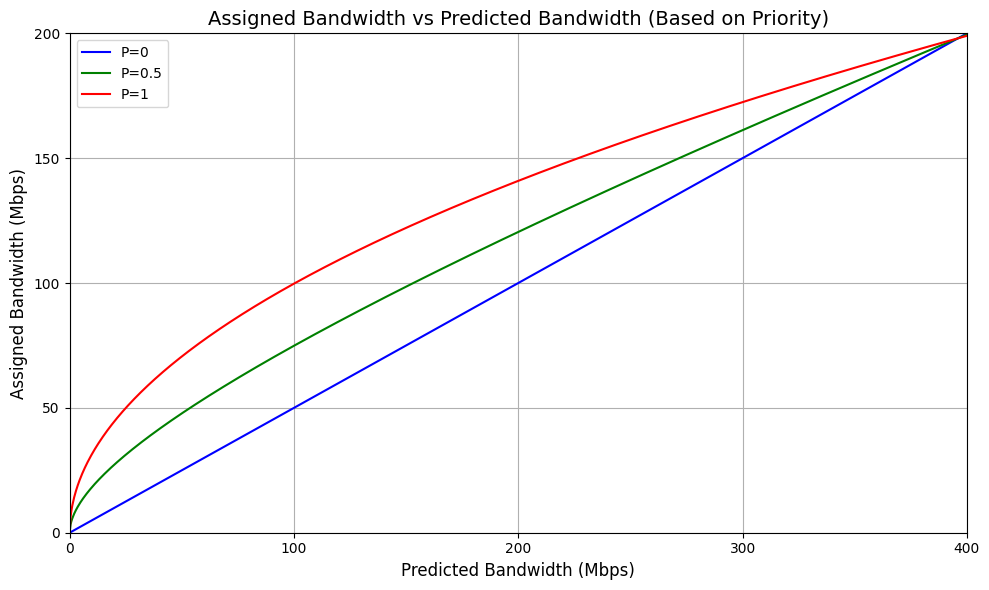

Sample calculations:
Bandwidth: 0 Mbps
  P=0:   0.00 Mbps
  P=0.5: 0.00 Mbps
  P=1:   0.00 Mbps

Bandwidth: 100 Mbps
  P=0:   50.00 Mbps
  P=0.5: 74.88 Mbps
  P=1:   99.75 Mbps
  Percentage P=0:   50.00%
  Percentage P=0.5: 74.88%
  Percentage P=1:   99.75%

Bandwidth: 200 Mbps
  P=0:   100.00 Mbps
  P=0.5: 120.46 Mbps
  P=1:   140.92 Mbps
  Percentage P=0:   50.00%
  Percentage P=0.5: 60.23%
  Percentage P=1:   70.46%

Bandwidth: 300 Mbps
  P=0:   150.00 Mbps
  P=0.5: 161.23 Mbps
  P=1:   172.46 Mbps
  Percentage P=0:   50.00%
  Percentage P=0.5: 53.74%
  Percentage P=1:   57.49%

Bandwidth: 400 Mbps
  P=0:   200.00 Mbps
  P=0.5: 199.50 Mbps
  P=1:   199.00 Mbps
  Percentage P=0:   50.00%
  Percentage P=0.5: 49.88%
  Percentage P=1:   49.75%



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bandwidth range
BW_MIN = 0
BW_MAX = 400
bandwidth_values = np.linspace(BW_MIN, BW_MAX, 1000)

# Define the function for assigned bandwidth
def calculate_assigned_bandwidth(bandwidth_mbits, P):
    return ((1-P)*bandwidth_mbits / 2) + P*(np.sqrt(100*bandwidth_mbits)-(bandwidth_mbits/400))

results_P0 = [calculate_assigned_bandwidth(bw, 0) for bw in bandwidth_values]
results_P05 = [calculate_assigned_bandwidth(bw, 0.5) for bw in bandwidth_values]
results_P1 = [calculate_assigned_bandwidth(bw, 1) for bw in bandwidth_values]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(bandwidth_values, results_P0, label="P=0", color='blue')
ax1.plot(bandwidth_values, results_P05, label="P=0.5", color='green')
ax1.plot(bandwidth_values, results_P1, label="P=1", color='red')
ax1.set_xlabel("Predicted Bandwidth (Mbps)", fontsize=12)
ax1.set_ylabel("Assigned Bandwidth (Mbps)", fontsize=12)
ax1.set_title("Assigned Bandwidth vs Predicted Bandwidth (Based on Priority)", fontsize=14)
ax1.grid(True)
ax1.set_xlim(0, 400)
ax1.set_xticks(np.arange(0, 401, 100))
ax1.set_ylim(0, 200)
ax1.set_yticks(np.arange(0, 201, 50))
ax1.legend()

plt.tight_layout()
plt.show()

# Print some example values for verification
print("Sample calculations:")
for bw in [0, 100, 200, 300, 400]:
    print(f"Bandwidth: {bw} Mbps")
    p0_val = calculate_assigned_bandwidth(bw, 0)
    p05_val = calculate_assigned_bandwidth(bw, 0.5)
    p1_val = calculate_assigned_bandwidth(bw, 1)

    print(f"  P=0:   {p0_val:.2f} Mbps")
    print(f"  P=0.5: {p05_val:.2f} Mbps")
    print(f"  P=1:   {p1_val:.2f} Mbps")

    if bw > 0:
        print(f"  Percentage P=0:   {p0_val/bw*100:.2f}%")
        print(f"  Percentage P=0.5: {p05_val/bw*100:.2f}%")
        print(f"  Percentage P=1:   {p1_val/bw*100:.2f}%")
    print("")

43.25


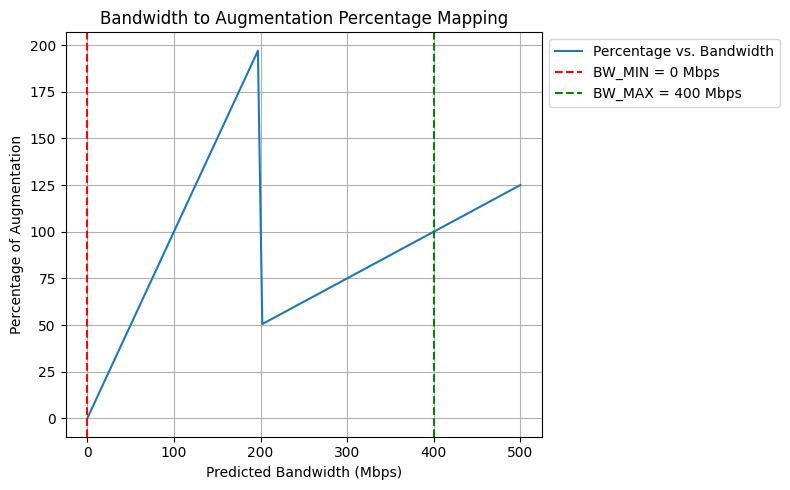

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

BW_MIN = 0   # Minimum bandwidth (in Mbps)
BW_MAX = 400  # Maximum bandwidth (in Mbps)

k1 = 100 / (BW_MAX - BW_MIN)
b1 = (k1 * BW_MIN)


bandwidth_values = np.linspace(0, 500, 100)

percentages = []

print(k1 * 173 + b1)

for B in bandwidth_values:
    if B <= BW_MAX//2:
        percentages.append(B)
    elif B >= BW_MIN:
        percentage = k1 * B + b1
        percentages.append(percentage)
    else:
        percentages.append(0)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(bandwidth_values, percentages, label="Percentage vs. Bandwidth")
plt.axvline(BW_MIN, color='red', linestyle='--', label=f'BW_MIN = {BW_MIN} Mbps')
plt.axvline(BW_MAX, color='green', linestyle='--', label=f'BW_MAX = {BW_MAX} Mbps')

plt.xlabel("Predicted Bandwidth (Mbps)")
plt.ylabel("Percentage of Augmentation")
plt.title("Bandwidth to Augmentation Percentage Mapping")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of the legend
plt.show()

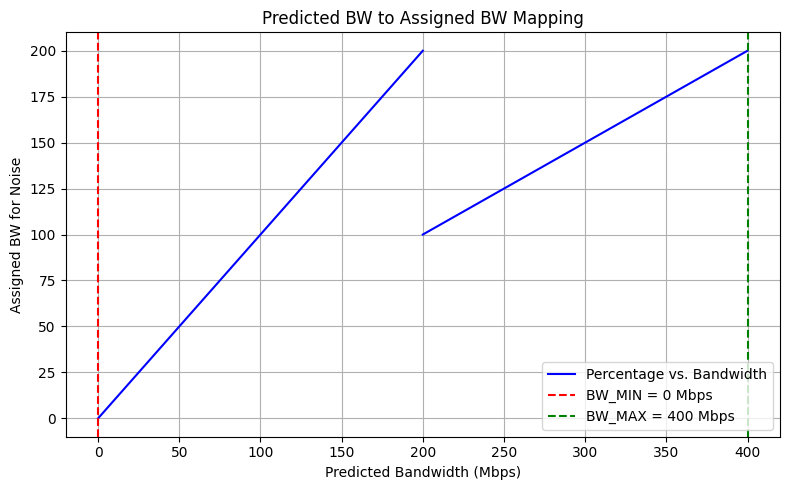

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

BW_MIN = 0   # Minimum bandwidth (in Mbps)
BW_MAX = 400  # Maximum bandwidth (in Mbps)

k1 = 0.5
b1 = 0

# Create two separate sets of data points to avoid connecting the discontinuity
bw_values_lower = np.linspace(0, BW_MAX//2, 50)
bw_values_upper = np.linspace(200, 400, 50)
bandwidth_values = np.concatenate([bw_values_lower, bw_values_upper])

percentages_lower = [B for B in bw_values_lower]
percentages_upper = [k1 * B + b1 for B in bw_values_upper]

# Plot the results
plt.figure(figsize=(8, 5))
# Plot the two segments separately to avoid the connecting line
plt.plot(bw_values_lower, percentages_lower, label="Percentage vs. Bandwidth", color='blue')
plt.plot(bw_values_upper, percentages_upper, color='blue')
plt.axvline(BW_MIN, color='red', linestyle='--', label=f'BW_MIN = {BW_MIN} Mbps')
plt.axvline(BW_MAX, color='green', linestyle='--', label=f'BW_MAX = {BW_MAX} Mbps')

plt.xlabel("Predicted Bandwidth (Mbps)")
plt.ylabel("Assigned BW for Noise")
plt.title("Predicted BW to Assigned BW Mapping")

plt.legend(loc='lower right')

plt.grid(True)
plt.tight_layout()
plt.show()

86.5


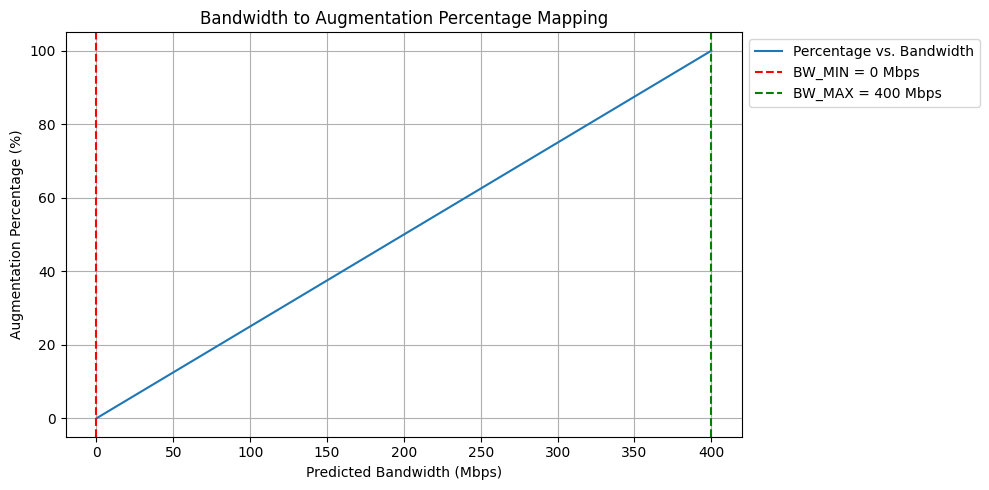

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

BW_MIN = 0   # Minimum bandwidth (in Mbps)
BW_MAX = 400  # Maximum bandwidth (in Mbps)

k1 = 0.5
b1 = 0


bandwidth_values = np.linspace(0, 400, 100)

percentages = []

print(k1 *  173 + b1)

for B in bandwidth_values:
        percentage = (B/BW_MAX) * 100
        percentages.append(percentage)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(bandwidth_values, percentages, label="Percentage vs. Bandwidth")
plt.axvline(BW_MIN, color='red', linestyle='--', label=f'BW_MIN = {BW_MIN} Mbps')
plt.axvline(BW_MAX, color='green', linestyle='--', label=f'BW_MAX = {BW_MAX} Mbps')

plt.xlabel("Predicted Bandwidth (Mbps)")
plt.ylabel("Augmentation Percentage (%)")
plt.title("Bandwidth to Augmentation Percentage Mapping")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of the legend
plt.show()

In [ ]:
def calculate_file_percentage(current_bandwidth, file_size=1072.2, time_window=25):
    """
    Calculate what percentage of the file can be sent in the time window given the bandwidth.

    Args:
        current_bandwidth: Current bandwidth in Mbps
        file_size: Full file size in MB (default: 1072.2 MB)
        time_window: Time window in seconds (default: 25 seconds)

    Returns:
        Percentage of file that can be sent
    """
    # Convert bandwidth from Mbps to MBps and calculate transfer capacity
    transfer_capacity_mb = current_bandwidth * time_window / 8

    # Calculate percentage of file
    percentage = (transfer_capacity_mb / file_size) * 100

    # Constrain between 0 and 100%
    return max(0, min(100, percentage))


def calculate_constrained_percentage(current_bandwidth, bw_min, bw_max, file_size=1072.2):
    if current_bandwidth <= bw_min:
        return 0
    elif current_bandwidth >= bw_max:
        return 100
    else:
        return calculate_file_percentage(current_bandwidth, file_size)

calculate_constrained_percentage(170, 0, 370)

49.54765901883977

In [ ]:
import numpy as np
import scipy.interpolate as interp

def load_bin_file(filename, dtype=np.float64):
    """ Load binary file as numpy array """
    return np.fromfile(filename, dtype=dtype)

def interpolate_data(reduced, full_size):
    """ Interpolate reduced data using cubic spline """
    x_reduced = np.linspace(0, 1, len(reduced))
    x_full = np.linspace(0, 1, full_size)
    spline = interp.CubicSpline(x_reduced, reduced)
    return spline(x_full)

def apply_augmentation(interpolated, delta_r, delta_x, delta_z, percentage):
    """ Apply a percentage of augmentation files to interpolated data """
    correction = (delta_r + delta_x + delta_z) * (percentage / 100.0)
    return interpolated + correction

def compute_nrmse(original, reconstructed):
    """ Compute Normalized RMSE """
    rmse = np.sqrt(np.mean((original - reconstructed) ** 2))
    return rmse / (np.max(original) - np.min(original))

def compute_psnr(original, reconstructed):
    """ Compute PSNR """
    mse = np.mean((original - reconstructed) ** 2)
    max_val = np.max(original)
    return 10 * np.log10(max_val**2 / mse) if mse > 0 else float('inf')

# Load data
full_data = load_bin_file("full_data_xgc.bin")
reduced_data = load_bin_file("reduced_data_xgc_16.bin")
delta_r = load_bin_file("delta_r_xgc_o.bin")
delta_x = load_bin_file("delta_xgc_o.bin")
delta_z = load_bin_file("delta_z_xgc_o.bin")

# Interpolate reduced data
interpolated_data = interpolate_data(reduced_data, len(full_data))

# Compute errors at different augmentation levels
percentages = np.arange(0, 110, 10)
results = []

for p in percentages:
    reconstructed_data = apply_augmentation(interpolated_data, delta_r, delta_x, delta_z, p)
    nrmse = compute_nrmse(full_data, reconstructed_data)
    psnr = compute_psnr(full_data, reconstructed_data)
    results.append((p, nrmse, psnr))

# Save results
np.savetxt("error_metrics.txt", results, fmt="%d %.6f %.6f", header="Percentage NRMSE PSNR")
print("Saved error metrics to error_metrics.txt")
